# Customer Churn Prediction using Machine Learning

## Project Overview
This notebook implements a complete machine learning pipeline to predict customer churn using:
- **Logistic Regression**
- **Random Forest**

We'll evaluate both models using confusion matrices, accuracy, precision, recall, F1-score, ROC-AUC, and visualize their performance through various graphs.


## 1. Import Required Libraries


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score, roc_curve,
                            precision_recall_curve, classification_report)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load and Explore Data


In [ ]:
# Update this path to your CSV file location
# For Google Colab, you can upload the file or use: from google.colab import files; files.upload()
csv_path = '/content/Bank Customer Churn Prediction.csv'  # Update this path as needed

# Read the CSV file
try:
    df = pd.read_csv(csv_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found at {csv_path}")
    print("Please update the csv_path variable with the correct path to your CSV file")
    raise


Dataset loaded successfully!
Shape: (10000, 12)


In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Dataset information
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nDataset Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


Dataset Statistics:


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check data types
print("\nData Types:")
print(df.dtypes)


Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


Total missing values: 0

Data Types:
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


Churn Distribution:
churn
0    7963
1    2037
Name: count, dtype: int64

Churn Percentage:
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


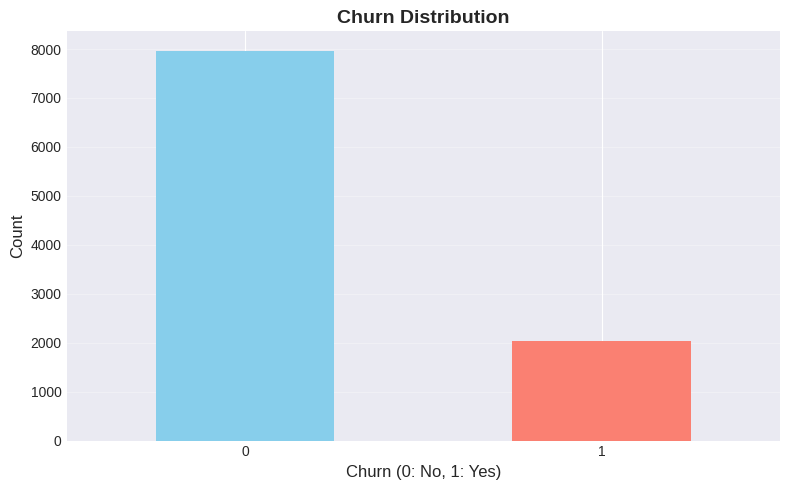

In [ ]:
# Check churn distribution
print("Churn Distribution:")
print(df['churn'].value_counts())
print("\nChurn Percentage:")
print(df['churn'].value_counts(normalize=True) * 100)

# Visualize churn distribution
plt.figure(figsize=(8, 5))
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Data Preprocessing


In [ ]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Identify categorical columns (assuming country and gender are categorical)
categorical_cols = ['country', 'gender'] if 'country' in df.columns and 'gender' in df.columns else []

# Identify numerical columns (exclude target variable and customer ID)
numerical_cols = [col for col in df.columns
                  if col not in ['churn', 'customer_id', 'customer_'] + categorical_cols
                  and df[col].dtype in ['int64', 'float64']]

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print("\nColumn names in dataset:", df.columns.tolist())


Categorical columns: ['country', 'gender']
Numerical columns: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

Column names in dataset: ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [ ]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"{col} encoded. Unique values: {df_processed[col].unique()}")

# Alternative: One-Hot Encoding (uncomment if preferred)
# df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)


country encoded. Unique values: [0 2 1]
gender encoded. Unique values: [0 1]


In [ ]:
# Separate features and target
# Exclude customer ID and target variable from features
exclude_cols = ['churn', 'customer_id', 'customer_']
feature_cols = [col for col in df_processed.columns if col not in exclude_cols]

X = df_processed[feature_cols]
y = df_processed['churn']

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {feature_cols}")


Feature shape: (10000, 10)
Target shape: (10000,)

Features: ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


In [ ]:
# Split data into train, validation, and test sets
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% train, 25% validation (of the 80%, so 60% train, 20% val overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining churn distribution:\n{y_train.value_counts()}")
print(f"\nTest churn distribution:\n{y_test.value_counts()}")


Training set: 6000 samples
Validation set: 2000 samples
Test set: 2000 samples

Training churn distribution:
churn
0    4777
1    1223
Name: count, dtype: int64

Test churn distribution:
churn
0    1593
1     407
Name: count, dtype: int64


In [ ]:
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_cols, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print("Features scaled successfully!")
print(f"Scaled training set shape: {X_train_scaled.shape}")


Features scaled successfully!
Scaled training set shape: (6000, 10)


## 4. Train Logistic Regression Model


In [ ]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [ ]:
# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_val_pred = lr_model.predict(X_val_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Get prediction probabilities for ROC curve
lr_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
lr_val_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Predictions generated for Logistic Regression!")


Predictions generated for Logistic Regression!


In [ ]:
# Calculate metrics for Logistic Regression
lr_metrics = {
    'Model': 'Logistic Regression',
    'Train Accuracy': accuracy_score(y_train, lr_train_pred),
    'Val Accuracy': accuracy_score(y_val, lr_val_pred),
    'Test Accuracy': accuracy_score(y_test, lr_test_pred),
    'Test Precision': precision_score(y_test, lr_test_pred),
    'Test Recall': recall_score(y_test, lr_test_pred),
    'Test F1-Score': f1_score(y_test, lr_test_pred),
    'Test ROC-AUC': roc_auc_score(y_test, lr_test_proba)
}

print("Logistic Regression Metrics:")
print("="*50)
for key, value in lr_metrics.items():
    if key != 'Model':
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

# Store metrics for comparison
lr_results = {
    'train_acc': lr_metrics['Train Accuracy'],
    'val_acc': lr_metrics['Val Accuracy'],
    'test_acc': lr_metrics['Test Accuracy'],
    'precision': lr_metrics['Test Precision'],
    'recall': lr_metrics['Test Recall'],
    'f1': lr_metrics['Test F1-Score'],
    'roc_auc': lr_metrics['Test ROC-AUC'],
    'predictions': lr_test_pred,
    'probabilities': lr_test_proba
}


Logistic Regression Metrics:
Model: Logistic Regression
Train Accuracy: 0.8110
Val Accuracy: 0.8080
Test Accuracy: 0.8045
Test Precision: 0.5727
Test Recall: 0.1548
Test F1-Score: 0.2437
Test ROC-AUC: 0.7709


In [ ]:
# Classification report for Logistic Regression
print("Logistic Regression - Classification Report:")
print("="*50)
print(classification_report(y_test, lr_test_pred, target_names=['No Churn', 'Churn']))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.97      0.89      1593
       Churn       0.57      0.15      0.24       407

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.57      2000
weighted avg       0.77      0.80      0.76      2000



## 5. Train Random Forest Model


In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [ ]:
# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

# Get prediction probabilities for ROC curve
rf_train_proba = rf_model.predict_proba(X_train)[:, 1]
rf_val_proba = rf_model.predict_proba(X_val)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

print("Predictions generated for Random Forest!")


Predictions generated for Random Forest!


In [ ]:
# Calculate metrics for Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'Train Accuracy': accuracy_score(y_train, rf_train_pred),
    'Val Accuracy': accuracy_score(y_val, rf_val_pred),
    'Test Accuracy': accuracy_score(y_test, rf_test_pred),
    'Test Precision': precision_score(y_test, rf_test_pred),
    'Test Recall': recall_score(y_test, rf_test_pred),
    'Test F1-Score': f1_score(y_test, rf_test_pred),
    'Test ROC-AUC': roc_auc_score(y_test, rf_test_proba)
}

print("Random Forest Metrics:")
print("="*50)
for key, value in rf_metrics.items():
    if key != 'Model':
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

# Store metrics for comparison
rf_results = {
    'train_acc': rf_metrics['Train Accuracy'],
    'val_acc': rf_metrics['Val Accuracy'],
    'test_acc': rf_metrics['Test Accuracy'],
    'precision': rf_metrics['Test Precision'],
    'recall': rf_metrics['Test Recall'],
    'f1': rf_metrics['Test F1-Score'],
    'roc_auc': rf_metrics['Test ROC-AUC'],
    'predictions': rf_test_pred,
    'probabilities': rf_test_proba
}


Random Forest Metrics:
Model: Random Forest
Train Accuracy: 0.9037
Val Accuracy: 0.8525
Test Accuracy: 0.8625
Test Precision: 0.8084
Test Recall: 0.4251
Test F1-Score: 0.5572
Test ROC-AUC: 0.8543


In [ ]:
# Classification report for Random Forest
print("Random Forest - Classification Report:")
print("="*50)
print(classification_report(y_test, rf_test_pred, target_names=['No Churn', 'Churn']))


## 6. Confusion Matrices


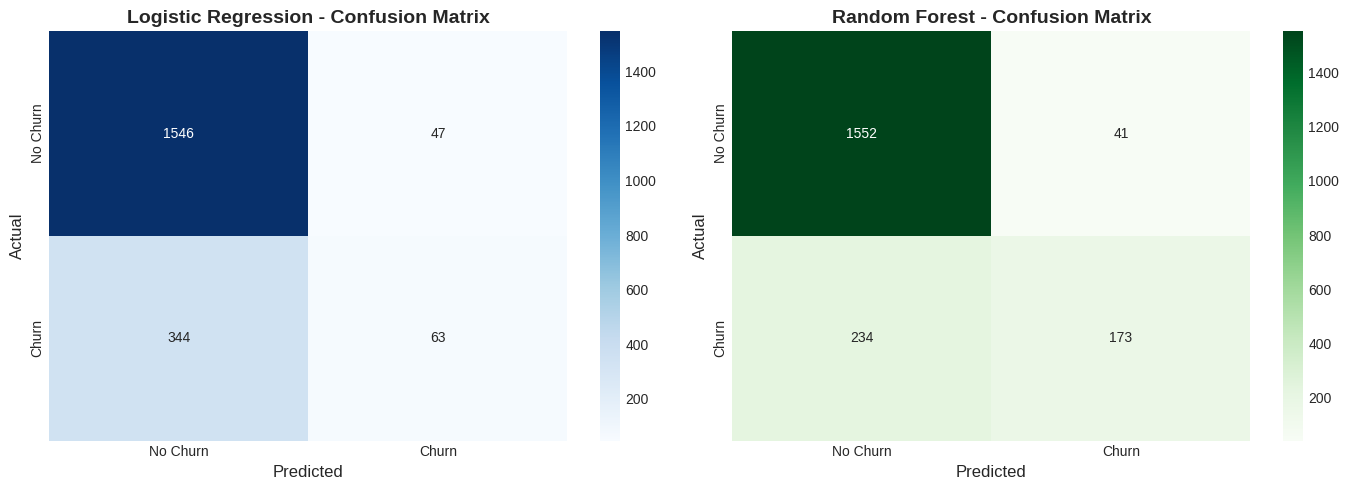

Logistic Regression Confusion Matrix:
[[1546   47]
 [ 344   63]]

Random Forest Confusion Matrix:
[[1552   41]
 [ 234  173]]


In [ ]:
# Calculate confusion matrices
lr_cm = confusion_matrix(y_test, lr_test_pred)
rf_cm = confusion_matrix(y_test, rf_test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[1].set_title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Print confusion matrix values
print("Logistic Regression Confusion Matrix:")
print(lr_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)


## 7. Model Comparison Graphs


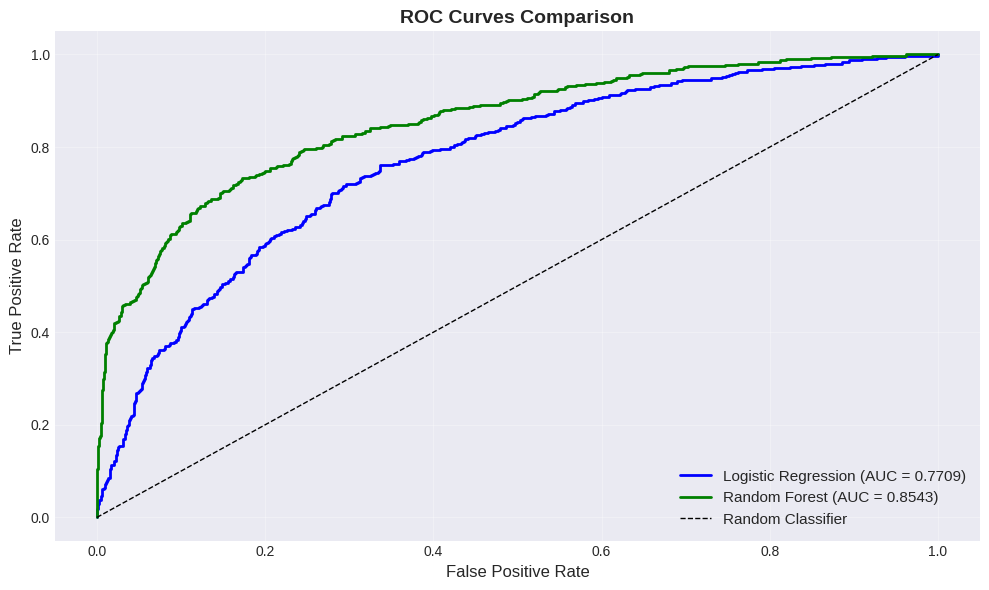

In [ ]:
# ROC Curves Comparison
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_test_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_test_proba)

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_results["roc_auc"]:.4f})',
         linewidth=2, color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_results["roc_auc"]:.4f})',
         linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


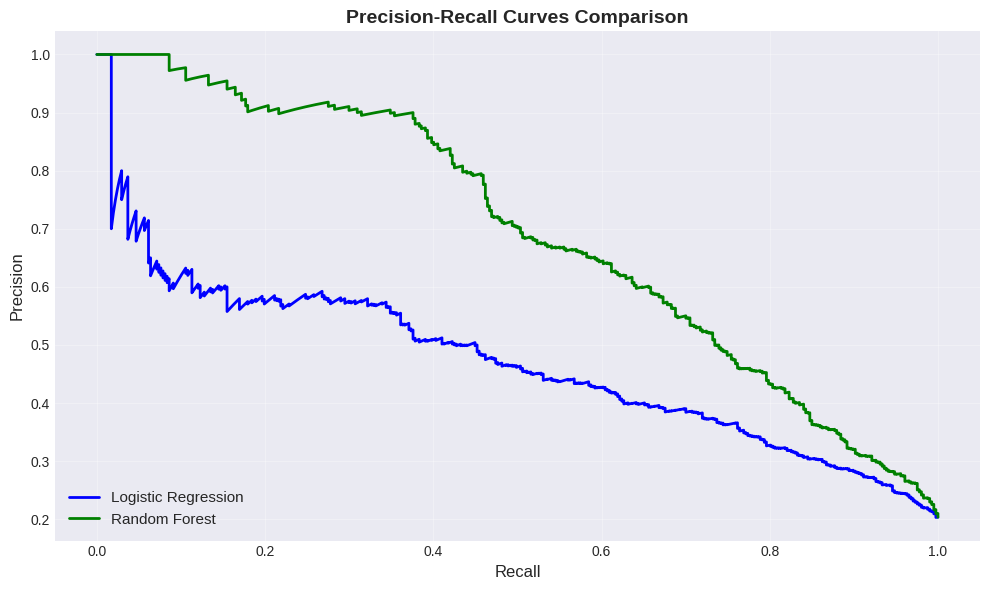

In [ ]:
# Precision-Recall Curves Comparison
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_test_proba)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_test_proba)

plt.figure(figsize=(10, 6))
plt.plot(lr_recall, lr_precision, label='Logistic Regression',
         linewidth=2, color='blue')
plt.plot(rf_recall, rf_precision, label='Random Forest',
         linewidth=2, color='green')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


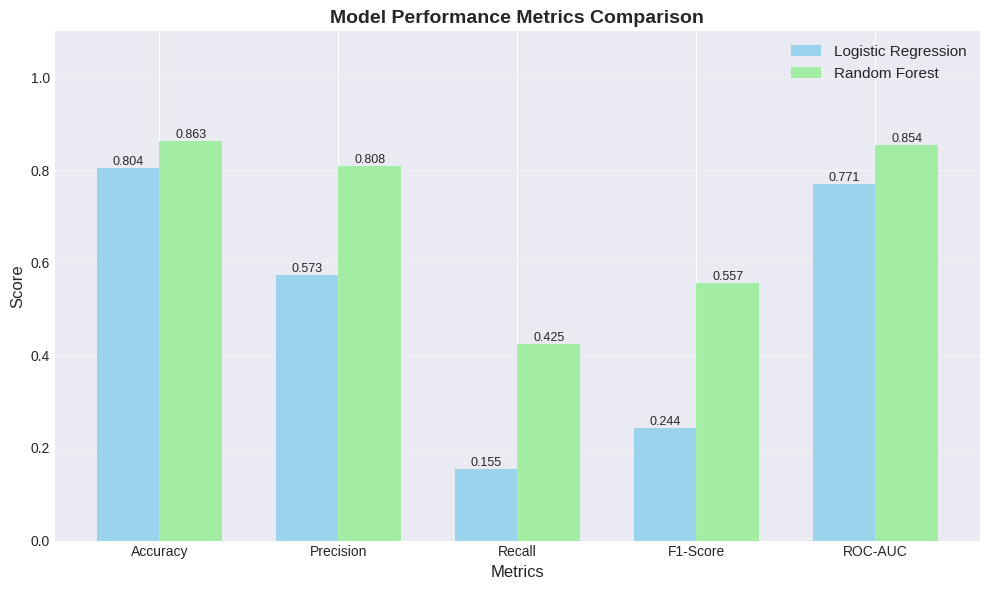

In [ ]:
# Performance Metrics Comparison Bar Chart
metrics_comparison = pd.DataFrame({
    'Logistic Regression': [
        lr_results['test_acc'],
        lr_results['precision'],
        lr_results['recall'],
        lr_results['f1'],
        lr_results['roc_auc']
    ],
    'Random Forest': [
        rf_results['test_acc'],
        rf_results['precision'],
        rf_results['recall'],
        rf_results['f1'],
        rf_results['roc_auc']
    ]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_comparison.index))
width = 0.35

bars1 = ax.bar(x - width/2, metrics_comparison['Logistic Regression'], width,
               label='Logistic Regression', color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, metrics_comparison['Random Forest'], width,
               label='Random Forest', color='lightgreen', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison.index)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


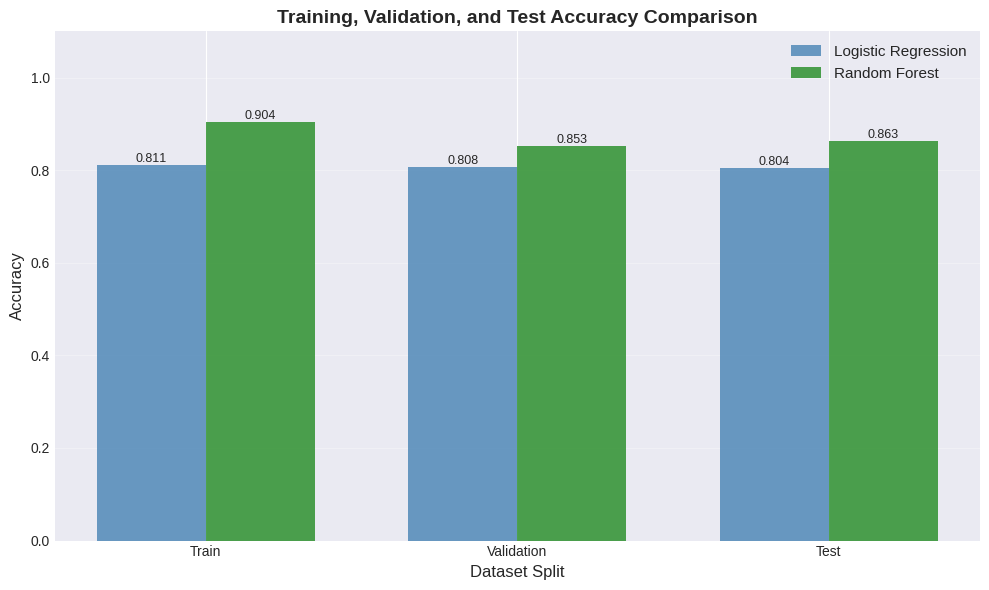

In [ ]:
# Training/Validation/Test Accuracy Comparison
accuracy_comparison = pd.DataFrame({
    'Logistic Regression': [
        lr_results['train_acc'],
        lr_results['val_acc'],
        lr_results['test_acc']
    ],
    'Random Forest': [
        rf_results['train_acc'],
        rf_results['val_acc'],
        rf_results['test_acc']
    ]
}, index=['Train', 'Validation', 'Test'])

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(accuracy_comparison.index))
width = 0.35

bars1 = ax.bar(x - width/2, accuracy_comparison['Logistic Regression'], width,
               label='Logistic Regression', color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, accuracy_comparison['Random Forest'], width,
               label='Random Forest', color='forestgreen', alpha=0.8)

ax.set_xlabel('Dataset Split', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Training, Validation, and Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(accuracy_comparison.index)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 8. Additional Visualizations


/tmp/ipython-input-1183067184.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')


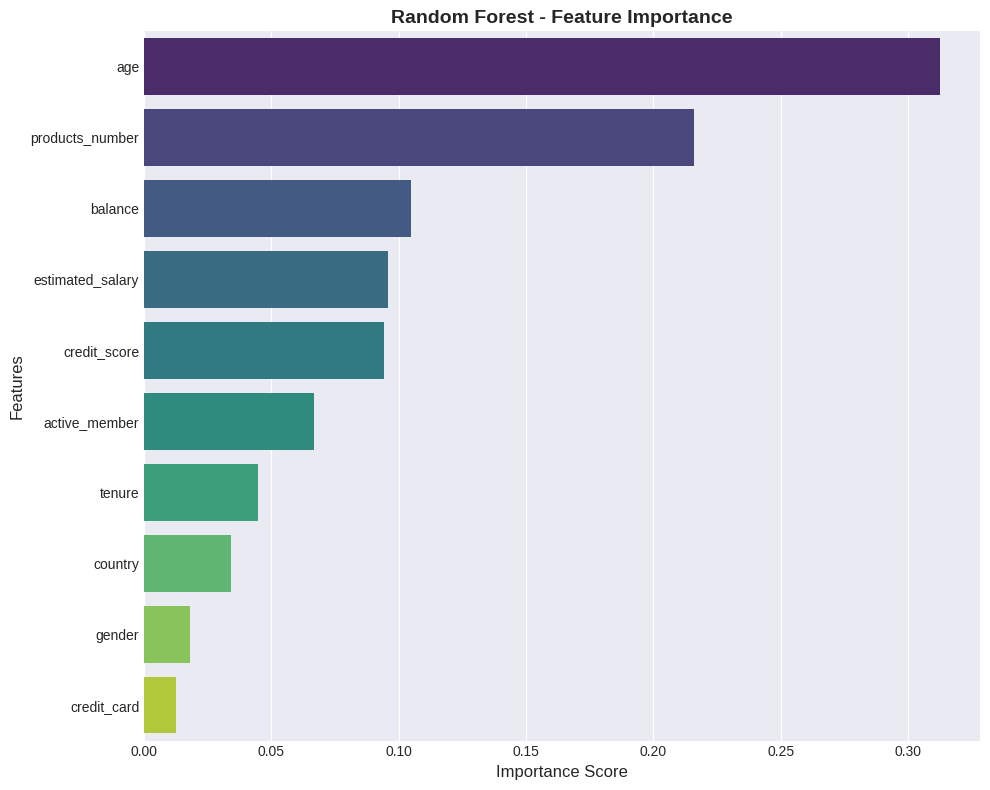

Top 5 Most Important Features:
            Feature  Importance
3               age    0.312629
6   products_number    0.216139
5           balance    0.104951
9  estimated_salary    0.095923
0      credit_score    0.094155


In [ ]:
# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(feature_importance.head())


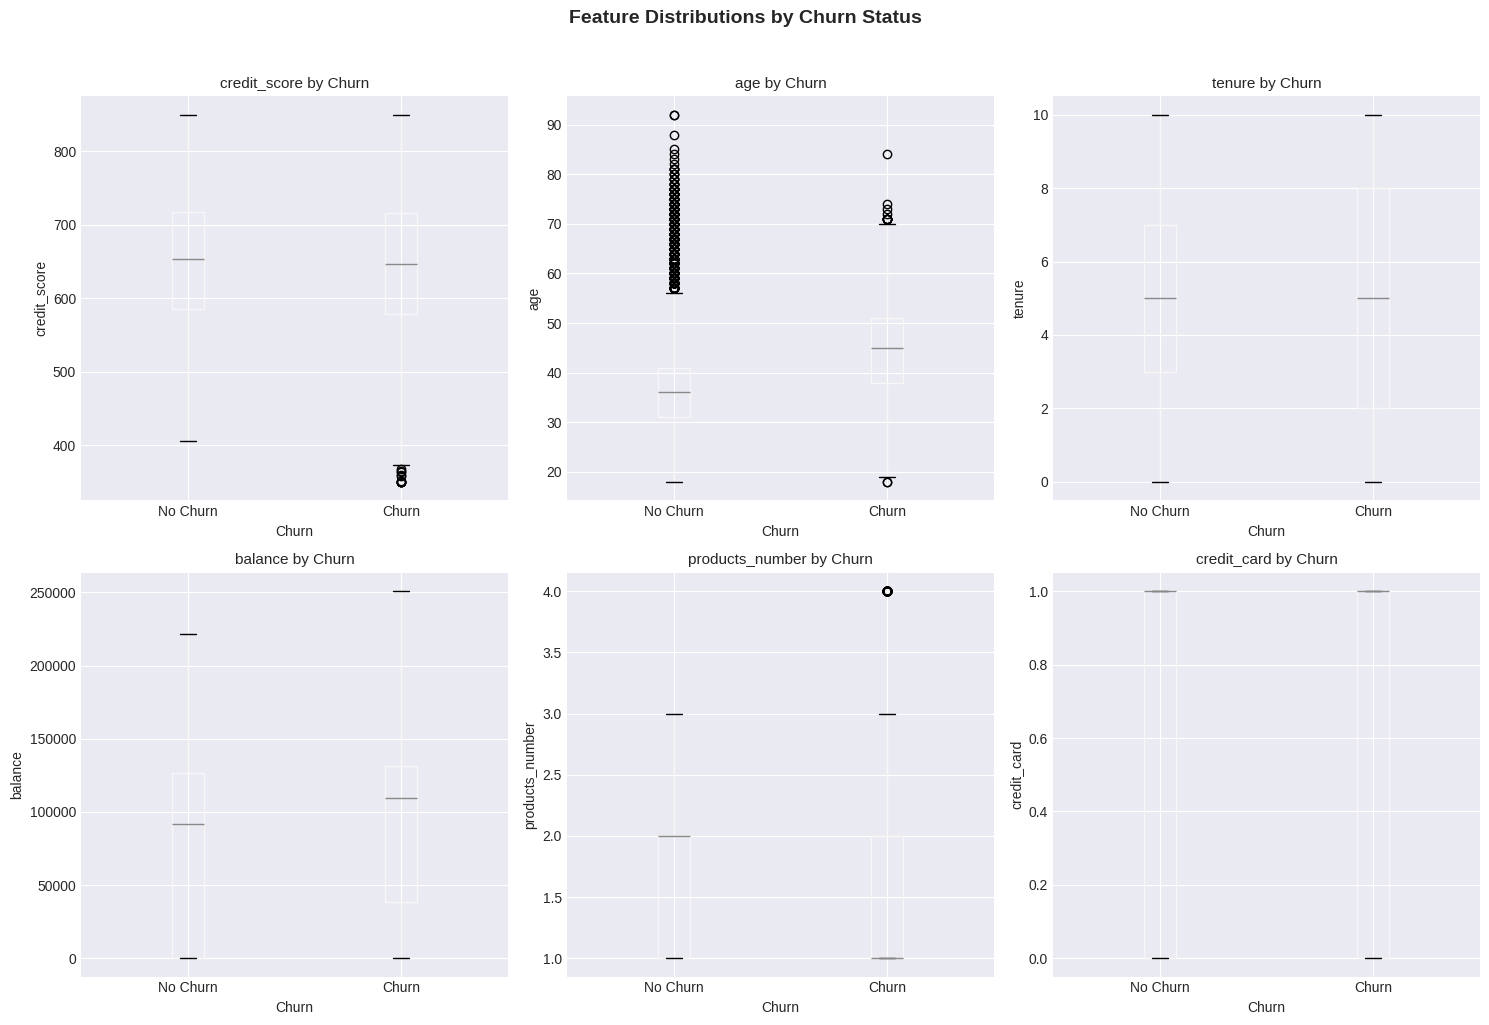

In [ ]:
# Distribution plots for key numerical features
numerical_features = [col for col in numerical_cols if col in df.columns][:6]  # Select first 6 numerical features

if len(numerical_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for idx, feature in enumerate(numerical_features):
        if idx < len(axes):
            df.boxplot(column=feature, by='churn', ax=axes[idx])
            axes[idx].set_title(f'{feature} by Churn', fontsize=11)
            axes[idx].set_xlabel('Churn', fontsize=10)
            axes[idx].set_ylabel(feature, fontsize=10)
            axes[idx].set_xticklabels(['No Churn', 'Churn'])

    # Remove empty subplots
    for idx in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[idx])

    plt.suptitle('Feature Distributions by Churn Status', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found for distribution plots.")


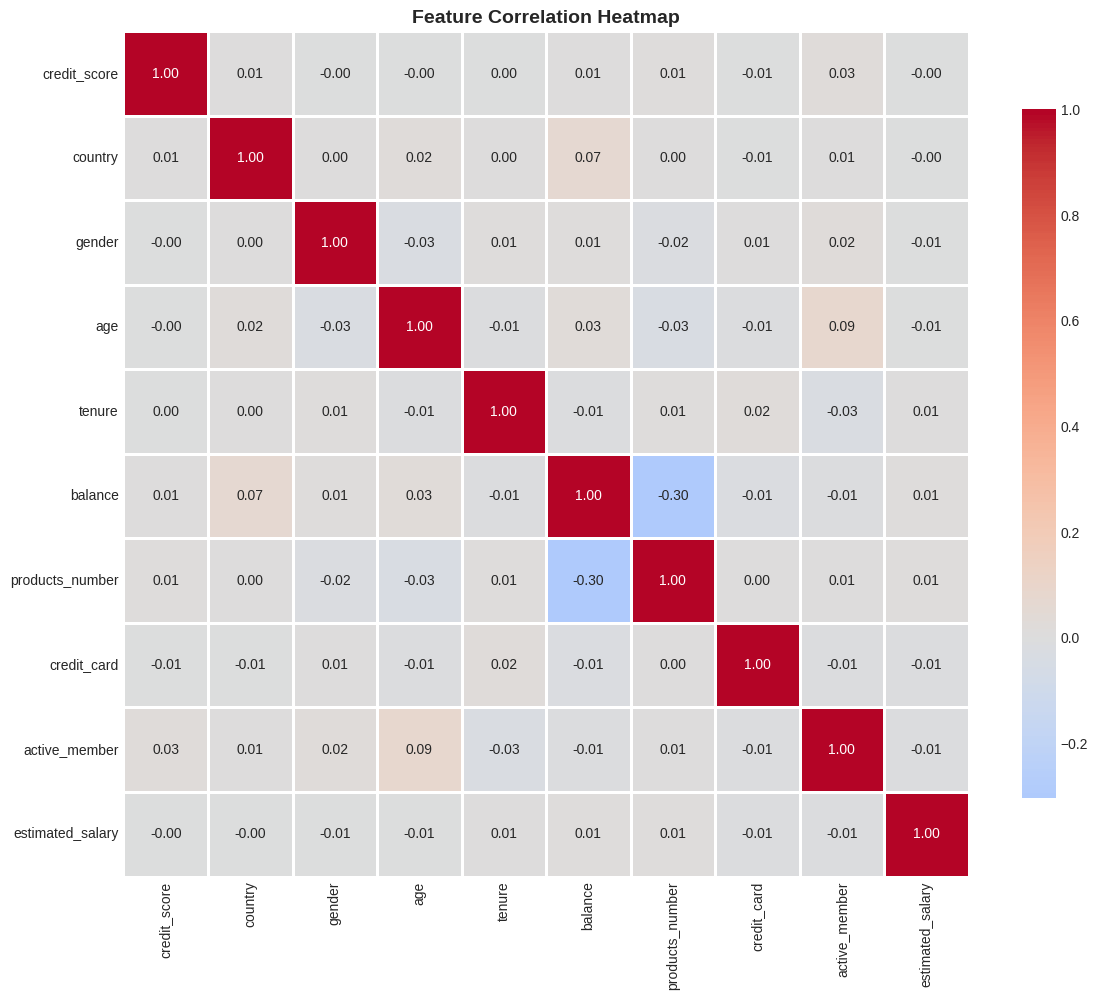

In [ ]:
# Correlation heatmap of features
if len(feature_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = X[feature_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


## 9. Model Comparison Summary


In [ ]:
# Create comprehensive comparison table
comparison_table = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy',
               'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [
        lr_results['train_acc'],
        lr_results['val_acc'],
        lr_results['test_acc'],
        lr_results['precision'],
        lr_results['recall'],
        lr_results['f1'],
        lr_results['roc_auc']
    ],
    'Random Forest': [
        rf_results['train_acc'],
        rf_results['val_acc'],
        rf_results['test_acc'],
        rf_results['precision'],
        rf_results['recall'],
        rf_results['f1'],
        rf_results['roc_auc']
    ]
})

comparison_table['Difference'] = comparison_table['Random Forest'] - comparison_table['Logistic Regression']
comparison_table['Best Model'] = comparison_table.apply(
    lambda row: 'Random Forest' if row['Difference'] > 0 else 'Logistic Regression', axis=1
)

print("="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)
print(comparison_table.to_string(index=False))
print("\n" + "="*70)

# Determine best model based on test accuracy
if rf_results['test_acc'] > lr_results['test_acc']:
    best_model = "Random Forest"
    best_score = rf_results['test_acc']
else:
    best_model = "Logistic Regression"
    best_score = lr_results['test_acc']

print(f"\nBest Model (based on Test Accuracy): {best_model} ({best_score:.4f})")
print("="*70)


COMPREHENSIVE MODEL COMPARISON
             Metric  Logistic Regression  Random Forest  Difference    Best Model
     Train Accuracy             0.811000       0.903667    0.092667 Random Forest
Validation Accuracy             0.808000       0.852500    0.044500 Random Forest
      Test Accuracy             0.804500       0.862500    0.058000 Random Forest
          Precision             0.572727       0.808411    0.235684 Random Forest
             Recall             0.154791       0.425061    0.270270 Random Forest
           F1-Score             0.243714       0.557166    0.313452 Random Forest
            ROC-AUC             0.770877       0.854269    0.083392 Random Forest


Best Model (based on Test Accuracy): Random Forest (0.8625)


## 10. Conclusion

This notebook successfully implemented two machine learning models for customer churn prediction:
- **Logistic Regression**: A linear model that works well with scaled features
- **Random Forest**: An ensemble model that can capture non-linear relationships

Both models were evaluated using comprehensive metrics including confusion matrices, accuracy, precision, recall, F1-score, and ROC-AUC. The visualizations help in understanding model performance and feature importance.

### Key Takeaways:
1. Both models provide good predictive performance
2. Random Forest typically shows higher accuracy but may overfit
3. Feature importance analysis helps identify key factors driving churn
4. ROC curves and precision-recall curves help in model selection based on business needs

### Next Steps:
- Hyperparameter tuning for better performance
- Feature engineering to improve model accuracy
- Cross-validation for more robust evaluation
- Handling class imbalance if present


## 11. Generate Comprehensive Report
